# 오버샘플링과 언더샘플링
---
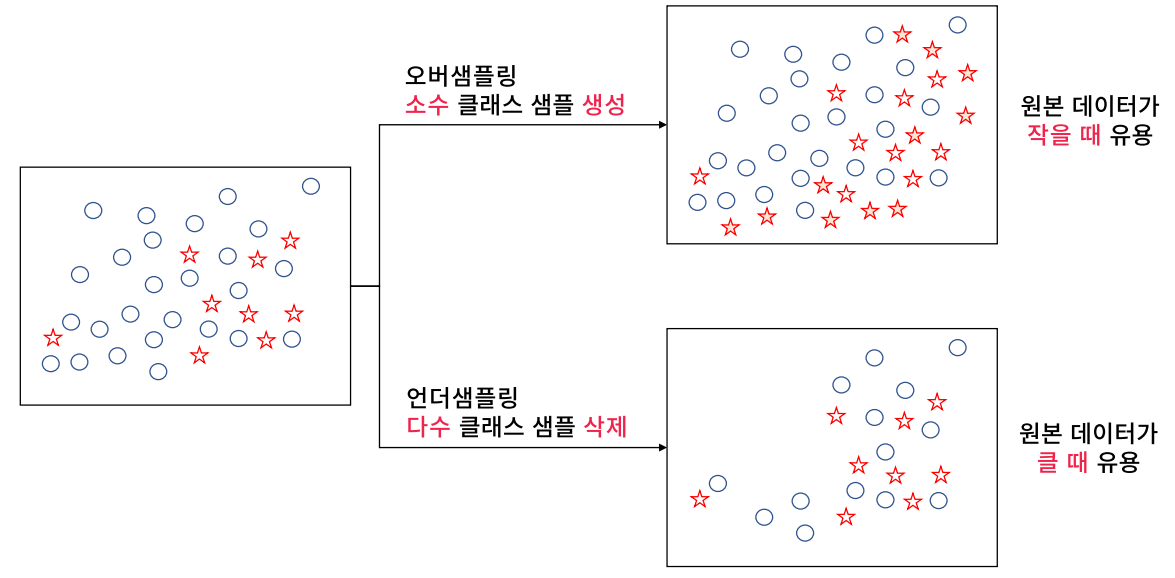

---

- 일반적으로 원본데이터가 작을때는 오버샘플링, 원본 데이터가 클때는 언더샘플링을 한다.<br><br>
- 단순 산술로 생각해보아도 이러한 선택에 대한 논리는 간단하다.<br><br>
    - 다수 클래스인 샘플이 10억개, 소수 클래스인 샘플이 1억개인 데이터 셋이 있다고 가정<br><br>
    - 이때 소수 클래스 샘플을 오버샘플링하면 (실제로는 아니지만) 약 9억개의 fake data를 만들어야 한다.<br><br>
    - 그렇게 되면 약 20억개의 데이터가 생성되는데, 이 데이터를 모두 모델에 학습 시키는 것은 과도한 값이 될 수 도 있다.<br><br>
    - 추가적으로 오버샘플링된 9억개의 데이터는 모두 fake로 원본인 1억개보다도 그 수가 많기 때문에 올바른 모델의 성능 향상을 기대하기 어렵다.
  


# Resampling 하는 데이터는 어디에 만들고 어떤것을 지워야 할까?
---
- **클래스 불균형 문제 해소의 핵심은 소수 클래스 샘플의 결정 공간을 넓히는 것이다.<br><br>**
- 따라서, `결정 경계에 가까운` 다수 클래스 샘플은 제거하고, `결정 경계에 가까운` 소수 클래스 샘플은 생성해야 한다.

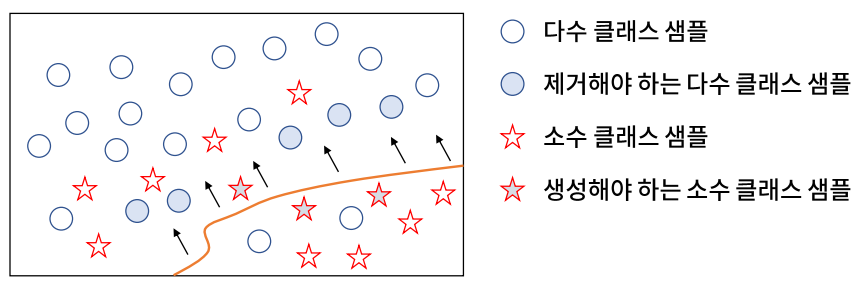

---
- **단, Test data는 절대로 resampling을 해서는 안된다.**(=새로 들어온 데이터에는 적용되지 않는다.)<br><br>
    - oversampling을 test데이터에 적용하면, 가짜데이터를 포함 상태로 평가를 하게 되어 객관적인 평가가 될 수 없다.<br>
    - 가짜데이터는 원본데이터와 흡사하게 만들어질 수 밖에 없다. 이는 train data와 test data가 굉장히 유사해진다는 의미이다.<br>
    - 이 경우 평가결과는 좋아질 수 있지만, 그 결과를 신뢰하기는 어렵다.
    <br><br>
    - undersampling의 경우도 정도의 차이는 있지만 마찬가지이다.<br>
    - 평가에 사용되어야 할 원본데이터가 100개였지만, 50개를 제거하는 방식이 undersampling이다.<br>
    - 이때 제거되는 데이터는 주로 평가하기 어려운 값이다. -> 평가 결과가 좋아질 수밖에 없지만 신뢰도는 떨어진다.
    ---
   

# 대표적인 오버샘플링 알고리즘 : SMOTE
---
- SMOTE(Synthetic Minority Over-Sampling Technique)<br><br>
- 2002년에 처음 제안되었고, 대부분의 오버샘플링 기법이 SMOTE를 기반으로 파생되었다.<br><br>
- 소수 클래스 샘플을 임의 선택한 뒤, 선택된 샘플의 이웃 중 하나의 샘플을 또 임의 선택 하여 선택된 두 샘플 사이에 새로운 가짜 샘플을 생성하는 방법을 원하는 수만큼 반복하는 식으로 오버샘플링을 한다.
---

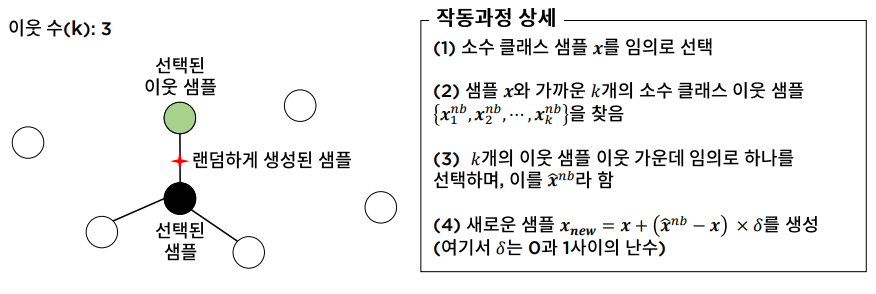

---

## 오버샘플링을 얼마나 하는게 이상적일까?
- 일반적으로는 5:5가 될때까지. 즉, 원본데이터와 새로 생성한 데이터가 1:1이 될때까지.<br>
    - 하지만 이 경우 재현율이 더 높아지고 정확도가 너무 떨어지는 상황이 생길 수도 있다.<br>
    - 따라서 3:1 이나 4:1 정도로 완전하게 불균형을 해소하지 않는 선에서 조정하는게 바람직하다.

# 관련 문법 : imblearn.over_sampling.SMOTE
---
**파라미터**
- sampling_strategy : 입력하지 않으면 1:1 비율이 맞춰질대까지 샘플을 생성. 사전 형태로 입력하여 클래스별로 생성하는 샘플의 수를 조절할 수도 있다.
- k_neighbors : SMOTE 에서 고려하는 이웃의 수 (=k값)
    - 실무자들은 보통 1, 3, 5 정도로 설정한다고 함. (kmeans를 할때 주로 사용하는 k값에 영향을 받음)
    - 짝수로 설정해도 문제는 없다.
    - 포인트는 k값을 너무 크지 않게 설정하는 것

**주요 메서드**
- .fit_sample(X,Y) : X와 Y에 대해서 SMOTE를 적용한 결과를 ndarray 형태로 return
    - 일반적인 sklearn의 함수처럼  fit과 sample이 따로 있지 않고 하나의 메서드로 적용된다.
    - Test data에는 적용하면 안되고, 할 필요도 없기 때문 (메서드 하나로 바로 fit하여 sample을 return)

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

반도체 공정의 센서값 데이터 (실습용 불균형 데이터)

In [2]:
df = pd.read_csv("Secom.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X582,X583,X584,X585,X586,X587,X588,X589,X590,Y
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [3]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [4]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
# 특징이 매우 많음 (590개)
Train_X.shape

(1175, 590)

In [6]:
# 클래스 불균형 확인
# 불량이 1096개 / 정상이 79개
# 즉, 언더샘플링을 적용하기에는 부적절 할 것으로 보인다.
Train_Y.value_counts()

-1    1093
 1      82
Name: Y, dtype: int64

# 클래스 불균형 탐색

## 클래스 불균형 테스트 by 클래스 불균형 비율 측정

In [7]:
# 클래스 불균형 비율로 한번더 불균형 여부 확인
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

13.329268292682928

## 클래스 불균형 테스트 by KNN

In [8]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

# 모델 생성
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)

# 예측
pred_Y = kNN_model.predict(Test_X)

# 재현율 출력
print(recall_score(Test_Y, pred_Y))

# 정확도 출력
print(accuracy_score(Test_Y, pred_Y))

# 정확도는 90%이상이지만, 재현율이 0%로 불균형이 심각한 수준이다.

0.0
0.9413265306122449


## 불균형 탐색 결론

- 불균형 비율이 9에 가깝고, KNN을 통한 테스트에서도 재현율이 0%이다. 
- 즉, 클래스 불균형이 매우 심각하다. => resampling이 필요하다.
- 하지만 특징은 매우 많은 것에 비해, 데이터 자체가 너무 부족하다.
- 클래스 1의 경우 79개의 값밖에 없어서, 언더 샘플링을 진행할 경우 남는 샘플이 너무 부족해진다.

# SMOTE로 오버샘플링 (5:5)

In [9]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors = 3)

# 오버샘플링 적용
# sampling_strategy을 적용하지 않음 = 클래스 비율 5:5가 될때까지 데이터 생성
o_Train_X, o_Train_Y = oversampling_instance.fit_sample(Train_X, Train_Y)

# 결과값인 ndarray를 DataFrame과 Series로 변환 
# 남은 전처리가 없다면 하지 않아도 된다.
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

In [10]:
# 비율이 1:1이 됨을 확인
o_Train_Y.value_counts()

-1    1093
 1    1093
Name: Y, dtype: int64

In [11]:
# 같은 KNN모델로 다시 평가: 정확도는 감소했으나, 재현율이 크게 오름을 확인
kNN_model = KNN(n_neighbors = 11).fit(o_Train_X, o_Train_Y)
pred_Y = kNN_model.predict(Test_X)

# 재현율
print(recall_score(Test_Y, pred_Y))

# 정확도
print(accuracy_score(Test_Y, pred_Y))

0.5909090909090909
0.5688775510204082


- 재현율이 0 -> 0.5로 상승했다.


- trade-off로 정확도는 매우 하락하였다.

- 정확도가 너무 떨어지는 것은 문제가 있을 수 있으므로 정확도를 일정 부분 보전 하기 위해 오버 샘플링 비율 지정 필요하다 판단.

# 비율을 조정한 SMOTE 

In [12]:
from imblearn.over_sampling import SMOTE
# SMOTE 인스턴스 생성
# sampling_strategy을 적용 (클래스별 비율을 사전형태로 입력)
# 클래스 명 : 생성할 샘플 수 (생성하고 난 뒤에 남게 되는 목표 샘플 수)
oversampling_instance = SMOTE(k_neighbors = 3, sampling_strategy = {1:int(Train_Y.value_counts().iloc[0] / 2),
                                                                    -1:Train_Y.value_counts().iloc[0]})

# 오버샘플링 적용
o_Train_X, o_Train_Y = oversampling_instance.fit_sample(Train_X, Train_Y)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

In [13]:
kNN_model = KNN(n_neighbors = 11).fit(o_Train_X, o_Train_Y)
pred_Y = kNN_model.predict(Test_X)


# 재현율
print(recall_score(Test_Y, pred_Y))

# 정확도
print(accuracy_score(Test_Y, pred_Y))

0.4090909090909091
0.701530612244898


# 결론
---

- 5:5 비율로 SMOTE 를 했을때보다 재현율은 낮아 졌지만, 정확도를 어느정도 유지하면서 오버샘플링에 성공했다. 


- 정확도와 재현율의 변화추이를 보고 분석가 본인이 직접 적당한 비율을 판단해서 resampling을 해야 한다.